In [1]:
# Autor: Lucas Coringa

# Importar bibliotecas necessárias
import pygrib
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import salem
import xarray as xr

In [2]:
# caminho e nome do arquivo GRIB
arquivo = 'dados/prog/gfs.t06z.pgrb2full.0p50.f192'

# Abrir o arquivo GRIB2
gr = pygrib.open(arquivo)

# Níveis nos INDEX
# [0] > 250 hpa
# [1] > 500 hpa
# [2] > 850 hpa

# Recurso: Listar os nomes das variáveis disponíveis
#for mensagem in gr:
#    print(mensagem.name)

# Listar todas as variáveis no arquivo
for msg in gr:
    print(msg)

1:Pressure reduced to MSL:Pa (instant):regular_ll:meanSea:level 0:fcst time 192 hrs:from 202309280600
2:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 192 hrs:from 202309280600
3:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 192 hrs:from 202309280600
4:Temperature:K (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 192 hrs:from 202309280600
5:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 192 hrs:from 202309280600
6:Total Cloud Cover:% (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 192 hrs:from 202309280600
7:Specific humidity:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 192 hrs:from 202309280600
8:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 192 hrs:from 202309280600
9:Geometric vertical velocity:m s**-1 (instant):regular_ll:isobaricInhPa:level 25000 Pa:fcst time 192 hrs:from 202309

### PLOT TEMPERATURA

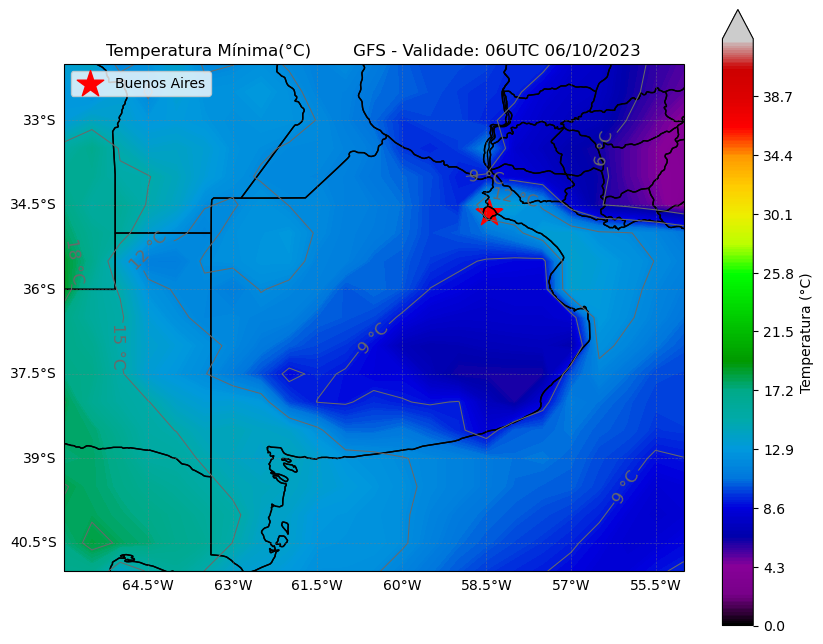

In [13]:
# A temperatura só está a 2 metros da superfície. So está no índice [0]

# Escolher a variável para o plot (por exemplo, a temperatura de 2 metros)
var = gr.select(name='Minimum temperature')[0]

# Obter os dados da variável e converter de Kelvin para Celsius
dados_kelvin = var.values
dados_celsius = dados_kelvin - 273.15

# Obter as informações de latitude e longitude
lats, lons = var.latlons()

# Criar um mapa de contorno da variável
plt.figure(figsize=(10, 8))

# Configurar a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adicionar os contornos políticos do Brasil
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor='black')

# Adicionar os contornos políticos do Brasil
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor='black')

# Adicionar os estados do Brasil (opcional)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=1.0, edgecolor='black')  # Certifique-se de especificar a escala '10m'

# Adicionar os estados do Brasil (opcional) - recurso opcional
#ax.add_feature(cfeature.STATES, linewidth=1.0, edgecolor='black')

# Adicione linhas de latitude e longitude apenas na esquerda e na parte inferior
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Não mostre rótulos no topo
gl.right_labels = False  # Não mostre rótulos à direita

# Plotar os dados de temperatura em graus Celsius
plt.contourf(lons, lats, dados_celsius, cmap='nipy_spectral', levels=np.arange(0, 43, 0.1), extend='max', transform=ccrs.PlateCarree())
plt.colorbar(label='Temperatura (°C)')

# Escolher as temperaturas que deseja plotar
niveis = np.arange(0, 41, 3)

# Plotar as isotermas com rótulos de temperatura
contours = plt.contour(lons, lats, dados_celsius, levels=niveis, colors='dimgrey', linewidths=0.75, transform=ccrs.PlateCarree())
plt.clabel(contours, inline=True, fontsize=12, fmt='%d °C', rightside_up=True)

x = -58.456608
y = -34.638304
# Criar um marcador
marker = plt.scatter(x, y, s=400, c='red', marker='*')
# Adicionar uma legenda
plt.legend([marker], ['Buenos Aires'], loc='upper left')

# Configurar título e rótulos dos eixos
plt.title('Temperatura Mínima(°C)        GFS - Validade: 06UTC 06/10/2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Salvar figura
plt.savefig('MinBA06-0UTC.png')

#### PLOT COBERTURA DE NUVENS

Text(0, 0.5, 'Latitude')

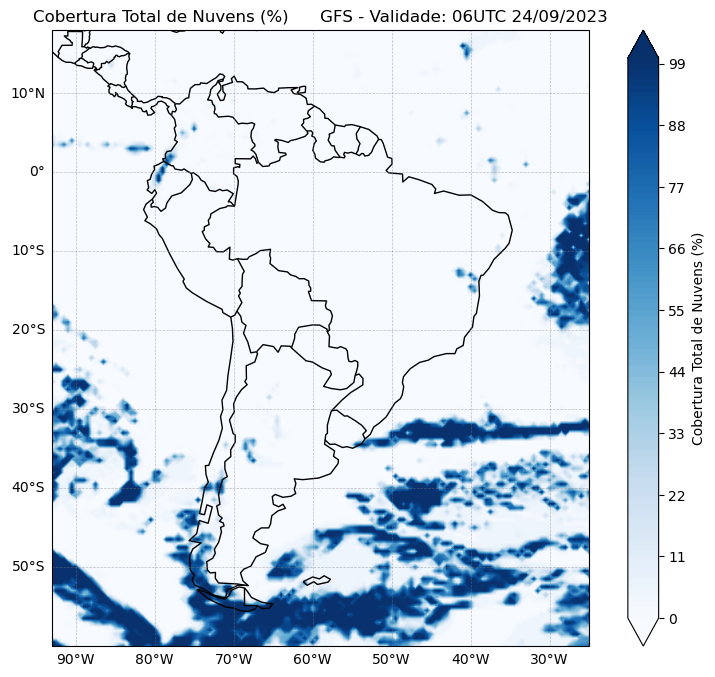

In [26]:
# Escolher a variável que você deseja plotar (Total Cloud Cover para 24 horas)
var = gr.select(name='Total Cloud Cover')[2]

# Obter os dados da variável
dados_cloud_cover = var.values

# Obter as informações de latitude e longitude
lats, lons = var.latlons()

# Criar um mapa de contorno da variável
plt.figure(figsize=(10, 8))

# Configurar a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adicionar os contornos políticos do Brasil
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor='black')

# Adicionar os contornos políticos do Brasil
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor='black')

# Adicionar os estados do Brasil (opcional)
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')

# Adicione linhas de latitude e longitude apenas na esquerda e na parte inferior
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Não mostre rótulos no topo
gl.right_labels = False  # Não mostre rótulos à direita

# Plotar os dados de cobertura de nuvens
plt.contourf(lons, lats, dados_cloud_cover, cmap='Blues', levels=np.arange(0, 101, 1), extend='both', transform=ccrs.PlateCarree())
plt.colorbar(label='Cobertura Total de Nuvens (%)')

# Configurar título e rótulos dos eixos
plt.title('Cobertura Total de Nuvens (%)      GFS - Validade: 06UTC 24/09/2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('TCCdia24.png')

### PLOT UMIDADE ESPECÍFICA

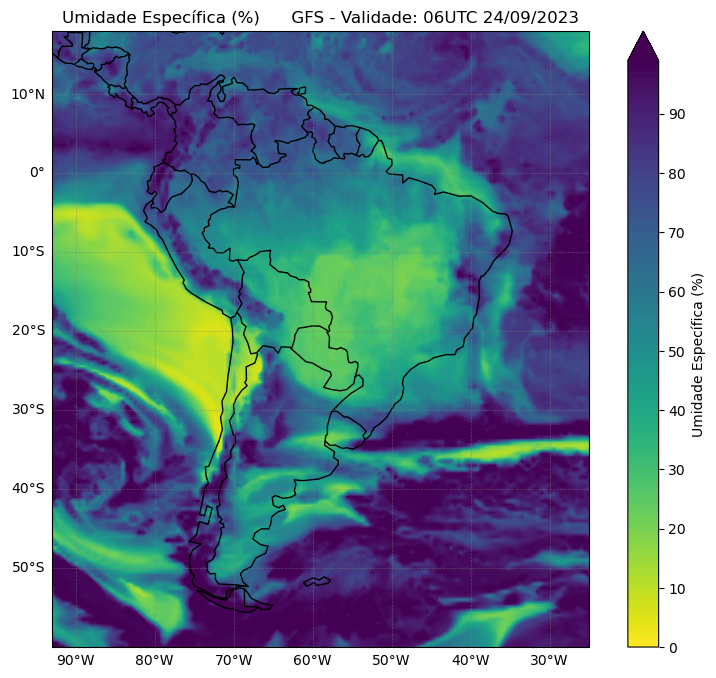

In [16]:
# Escolher a variável que você deseja plotar (Specific humidity para 24 horas)
var = gr.select(name='Relative humidity')[2]

# Obter os dados da variável
dados_especificos_umidade = var.values

# Obter as informações de latitude e longitude
lats, lons = var.latlons()

# Criar um mapa de contorno da variável
plt.figure(figsize=(10, 8))

# Configurar a projeção
ax = plt.axes(projection=ccrs.PlateCarree())

# Adicionar os contornos políticos do Brasil
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor='black')

# Adicionar os contornos políticos do Brasil
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor='black')

# Adicionar os estados do Brasil (opcional)
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')

# Adicione linhas de latitude e longitude apenas na esquerda e na parte inferior
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Não mostre rótulos no topo
gl.right_labels = False  # Não mostre rótulos à direita

# Plotar os dados de umidade específica
plt.contourf(lons, lats, dados_especificos_umidade, cmap='viridis_r', levels=np.arange(0, 100, 1), extend='max', transform=ccrs.PlateCarree())
plt.colorbar(label='Umidade Específica (%)')

# Configurar título e rótulos dos eixos
plt.title('Umidade Específica (%)      GFS - Validade: 06UTC 24/09/2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('URdia24.png')

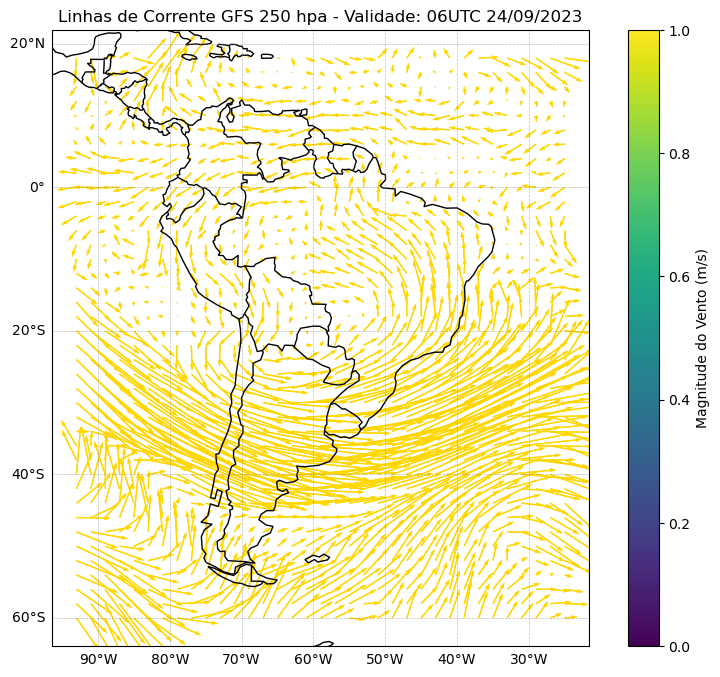

In [11]:
gr = pygrib.open(arquivo)

# Escolher as variáveis de vento U e V para a altitude e tempo desejados
var_u = gr.select(name='U component of wind')[0]
var_v = gr.select(name='V component of wind')[0]

# Obter os dados das componentes de vento U e V
dados_u = var_u.values
dados_v = var_v.values

# Obter as informações de latitude e longitude
lats, lons = var_u.latlons()

# Calcular as linhas de corrente (direção e magnitude)
magnitude = np.sqrt(dados_u ** 2 + dados_v ** 2)
direcao = np.arctan2(dados_v, dados_u)

# Escolha a densidade de vetores desejada (por exemplo, 10)
densidade_vetores = 4

# Crie subconjuntos dos dados de latitude, longitude, U e V
lats_sub = lats[::densidade_vetores, ::densidade_vetores]
lons_sub = lons[::densidade_vetores, ::densidade_vetores]
dados_u_sub = dados_u[::densidade_vetores, ::densidade_vetores]
dados_v_sub = dados_v[::densidade_vetores, ::densidade_vetores]

# Crie um mapa de contorno das linhas de corrente
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black')
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plotar as linhas de corrente com densidade reduzida e adicionar uma barra de cores
quiver_plot = plt.quiver(lons_sub, lats_sub, dados_u_sub, dados_v_sub, scale=400, transform=ccrs.PlateCarree(), color='gold')

# Adicione uma barra de cores associada ao seu gráfico
cbar = plt.colorbar(quiver_plot, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Magnitude do Vento (m/s)')  # Defina o rótulo da barra de cores

# Configurar título e rótulos dos eixos

# Plotar as linhas de corrente com densidade reduzida
plt.quiver(lons_sub, lats_sub, dados_u_sub, dados_v_sub, scale=400, transform=ccrs.PlateCarree(), color='gold')

# Configurar título e rótulos dos eixos
plt.title('Linhas de Corrente GFS 250 hpa - Validade: 06UTC 24/09/2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


#plt.savefig('250line.png', dpi=600)

### Verificando o que há nos index [0], [1] e [2]

In [21]:
# Suponha que você já tenha feito a seguinte atribuição:
var2 = gr.select(name='U component of wind')[2]

# Agora você pode acessar os dados da variável var2 da seguinte forma:
dados_var2 = var2.values

# Você também pode acessar outras informações, como latitudes e longitudes, se necessário:
lats_var2, lons_var2 = var2.latlons()

var2

42:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 24 hrs:from 202309230600